In [349]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

data = yf.download(tickers='BTC-EUR', start='2024-11-01', end='2024-11-29', interval='1H')

data.index = pd.to_datetime(data.index)

original_data = data[data.index <= pd.to_datetime('2024-11-28 14:00:00')]
original_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-11-01 00:00:00,64501.000000,64660.664062,64410.261719,64435.050781,64435.050781,0
2024-11-01 01:00:00,64404.917969,64483.566406,63716.203125,63716.203125,63716.203125,937852928
2024-11-01 02:00:00,63698.011719,63872.304688,63248.910156,63872.304688,63872.304688,2031120384
2024-11-01 03:00:00,63850.871094,63981.718750,63674.785156,63713.117188,63713.117188,522711040
2024-11-01 04:00:00,63710.343750,63936.843750,63671.621094,63896.000000,63896.000000,212033536
...,...,...,...,...,...,...
2024-11-28 10:00:00,90205.460938,90273.390625,89893.343750,90052.226562,90052.226562,495464448
2024-11-28 11:00:00,90033.703125,90746.226562,89873.398438,90525.320312,90525.320312,716587008
2024-11-28 12:00:00,90508.132812,90696.414062,90262.367188,90623.335938,90623.335938,0


In [350]:
data = original_data.copy()
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
data['ATR'] =data.ta.atr(length=20)

# data["CCI"] = ta.cci(data.High, data.Low, data.Close, length=16)
# data["AO"] = ta.ao(data.High, data.Low)
# data["MOM"] = ta.mom(data.Close, length=16)
# a = ta.macd(data.Close)
# data = data.join(a)
# data["BOP"] = ta.bop(data.Open, data.High, data.Low, data.Close, length=16)
# data["RVI"] = ta.rvi(data.Close)
# a = ta.dm(data.High, data.Low, length=16)
# data = data.join(a)
# a = ta.stoch(data.High, data.Low, data.Close)
# data = data.join(a)
# a = ta.stochrsi(data.Close, length=16)
# data = data.join(a)
# data["WPR"] = ta.willr(data.High, data.Low, data.Close, length=16)

data['Average'] = data.ta.midprice(length=1) #midprice
data['MA40'] = ta.sma(data.Close,length=40)
data['MA80'] = ta.sma(data.Close,length=80)
data['MA160'] = ta.sma(data.Close,length=160)

from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
data['slopeMA40'] = data['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
data['slopeMA80'] = data['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
data['slopeMA160'] = data['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
data['AverageSlope'] = data['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
data['RSISlope'] = data['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Datetime'], axis=1, inplace=True)

C:\Users\hozay\AppData\Local\Temp\ipykernel_16280\1328446895.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [351]:
data_set = data.iloc[:, 0:21]#.values
pd.set_option('display.max_columns', None)
data_set.head(20)

# print(data_set.shape)
# print(data.shape)
# print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,ATR,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,Target,TargetClass,TargetNextClose
0,70998.562500,71179.390625,70762.257812,70929.523438,67.627694,70068.962182,67153.008146,65587.430353,514.563252,70970.824219,69768.000391,66661.827197,65129.678857,82.602132,97.336423,43.297696,216.657143,1.134753,-588.625000,0,70307.250000
1,70895.875000,70974.609375,70307.250000,70307.250000,57.302370,70091.656260,67215.468381,65649.944521,522.204671,70640.929688,69788.107227,66753.693359,65169.329175,60.845631,97.143467,43.663070,84.325781,-0.778368,-103.898438,0,70199.093750
2,70302.992188,70302.992188,69920.539062,70199.093750,55.718171,70101.888402,67274.550072,65710.198153,515.428626,70111.765625,69808.485937,66848.217822,65210.393335,40.982383,96.058795,42.852271,-59.626116,-2.405567,100.515625,1,70314.179688
3,70213.664062,70464.710938,70185.945312,70314.179688,57.071238,70122.106619,67334.740757,65771.178041,503.593222,70325.328125,69858.682422,66939.770654,65251.768066,34.487640,94.536307,41.979086,-111.592076,-2.870882,201.242188,1,70508.125000
4,70306.882812,70740.398438,70306.882812,70508.125000,59.315840,70158.870275,67397.580049,65833.919060,500.088708,70523.640625,69916.602734,67043.729883,65293.661377,36.648633,94.877653,41.344057,-102.519754,-2.131076,-20.031250,0,70474.804688
5,70494.835938,70822.015625,70398.718750,70474.804688,58.750389,70188.959266,67458.515190,65895.387744,496.248456,70610.367188,69964.020508,67146.229199,65334.334033,40.450960,96.676355,41.075635,-55.445424,-1.056944,-215.015625,0,70262.601562
6,70477.617188,70498.609375,70204.171875,70262.601562,55.162230,70195.972818,67514.041653,65953.231636,486.156260,70351.390625,70002.318359,67247.849561,65371.250391,45.587991,99.107839,40.666328,7.040625,0.018302,187.593750,1,70449.289062
7,70261.695312,70449.289062,70186.476562,70449.289062,57.602978,70220.098175,67572.165364,66012.782065,474.987339,70317.882812,70030.093359,67349.415820,65409.305273,45.324648,100.935029,39.819409,34.157143,0.089473,-66.203125,0,70391.382812
8,70457.585938,70570.492188,70391.382812,70391.382812,56.579424,70236.410998,67627.991452,66070.776777,460.191260,70480.937500,70054.433203,67455.122070,65446.072388,38.786390,102.726722,38.724847,-2.805804,-0.319595,138.968750,1,70528.406250
9,70389.437500,70654.843750,70381.914062,70528.406250,58.451213,70264.220069,67685.425409,66129.818227,450.826870,70518.378906,70090.377539,67566.632959,65478.562280,33.368203,104.078864,37.079270,-12.803013,-0.239865,-80.632812,0,70438.648438


In [352]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [353]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.03118878 0.03456065 0.03326972 ... 0.34988464 0.         0.00429854]
 [0.02710838 0.02648513 0.01528511 ... 0.44713142 0.         0.        ]
 [0.00354955 0.         0.         ... 0.48814136 1.         0.00457395]
 ...
 [0.78757037 0.80617612 0.78865544 ... 0.491088   1.         0.81173728]
 [0.80642234 0.80421177 0.80402979 ... 0.52912309 1.         0.82317046]
 [0.81031989 0.81399593 0.80163353 ... 0.39731449 0.         0.80922938]]


In [354]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 100
print(data_set_scaled.shape[0])
for j in range(18):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
print(X.shape)
#print(y)
print(y.shape)

498
(398, 100, 18)
(398, 1)


In [355]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [356]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

318
(318, 100, 18)
(80, 100, 18)
(318, 1)
(80, 1)
[[0.51708037]
 [0.48397098]
 [0.50457659]
 [0.51901447]
 [0.51429365]
 [0.56023625]
 [0.54194913]
 [0.54789052]
 [0.49212746]
 [0.46657188]
 [0.47399963]
 [0.44262468]
 [0.44046268]
 [0.46755834]
 [0.45496979]
 [0.47717572]
 [0.46981473]
 [0.53919346]
 [0.53838399]
 [0.56828127]
 [0.51506151]
 [0.52583519]
 [0.50163462]
 [0.51163578]
 [0.51338233]
 [0.49977939]
 [0.48127802]
 [0.47722447]
 [0.45515206]
 [0.45218773]
 [0.48838099]
 [0.47991742]
 [0.48334346]
 [0.49134128]
 [0.4907237 ]
 [0.49240629]
 [0.54932254]
 [0.65409655]
 [0.69042363]
 [0.68864386]
 [0.67798662]
 [0.70529807]
 [0.61378887]
 [0.58880367]
 [0.54428004]
 [0.58881951]
 [0.61766917]
 [0.60239823]
 [0.61598471]
 [0.60753853]
 [0.60192223]
 [0.606195  ]
 [0.60077649]
 [0.57824579]
 [0.63128763]
 [0.62786998]
 [0.64474402]
 [0.6537491 ]
 [0.66483607]
 [0.65404221]
 [0.63515614]
 [0.55261662]
 [0.51508666]
 [0.56266559]
 [0.56973161]
 [0.56803225]
 [0.58130172]
 [0.52515644

In [357]:
print(X_train.shape[2])

18


In [358]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Activation, concatenate, TimeDistributed, Dropout
from tensorflow.keras.optimizers import Adam

lstm_input = Input(shape=(backcandles, X_train.shape[2]), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1680 - val_loss: 0.0100
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0099 - val_loss: 6.3648e-04
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0028 - val_loss: 7.1336e-04
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0023 - val_loss: 8.8963e-04
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0019 - val_loss: 6.0609e-04
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0013 - val_loss: 5.1806e-04
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3

In [359]:
backcandles = X_train.shape[1]
feature_count = X_train.shape[2]
# Define the input shape
lstm_input = Input(batch_shape=(1, backcandles, feature_count), name='lstm_input')

# LSTM layer with stateful=True
lstm = LSTM(250, stateful=True, return_sequences=False)(lstm_input)

# Dense layer for output
output = Dense(1, activation='linear', name='output')(lstm)

# Define the model
future_model = Model(inputs=lstm_input, outputs=output)
adam = Adam()
future_model.compile(optimizer=adam, loss='mse')

# Fit the model (note the batch_size=1 due to stateful LSTM)
future_model.fit(x=X_train, y=y_train, batch_size=1, epochs=30, shuffle=False, validation_split=0.1)

# # Define input shape dimensions
# backcandles = X_train.shape[1]
# feature_count = X_train.shape[2]

# # Define LSTM input layer
# lstm_input = Input(batch_shape=(1, backcandles, feature_count), name='lstm_input')

# # LSTM layers with stateful=True and return_sequences=True for deeper learning
# lstm = LSTM(150, stateful=True, return_sequences=True)(lstm_input)
# lstm = Dropout(0.2)(lstm)  # Adding dropout for regularization
# lstm = LSTM(100, stateful=True, return_sequences=False)(lstm)

# # Dense layer for output prediction
# output = Dense(1, activation='linear', name='output')(lstm)

# # Define the model
# future_model = Model(inputs=lstm_input, outputs=output)
# adam = Adam(learning_rate=0.001)  # Adjusted learning rate
# future_model.compile(optimizer=adam, loss='mse')

# # Fit the model
# future_model.fit(x=X_train, y=y_train, batch_size=1, epochs=10, shuffle=True, validation_split=0.1)


Epoch 1/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0225 - val_loss: 0.0063
Epoch 2/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0081 - val_loss: 0.0019
Epoch 3/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 4/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 5/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 6/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 7/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 8/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 9/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 10/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 11/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 12/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 

In [360]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[0.8836021] [0.94230533]
[0.8934288] [0.9446791]
[0.89997214] [0.94498897]
[0.9038359] [0.94009055]
[0.9089777] [0.93687471]
[0.9075196] [0.92231947]
[0.90484214] [0.89253273]
[0.89338034] [0.81807114]
[0.87216014] [0.84856241]
[0.8368174] [0.84976652]


In [361]:
# # Function to reset LSTM states
# def reset_model_states(model):
#     for layer in model.layers:
#         if isinstance(layer, LSTM):
#             layer.reset_states()

# # Function to predict future values
# def predict_future(model, last_data, num_predictions):
#     predictions = []
#     current_input = last_data

#     for _ in range(num_predictions):
#         reset_model_states(model)
#         prediction = model.predict(current_input, batch_size=1)
#         predictions.append(prediction[0, 0])
        
#         # Prepare the new input by removing the first time step and appending the prediction
#         # Expand the prediction to match the feature dimensions
#         prediction_expanded = np.full((1, 1, feature_count), prediction[0, 0])
#         new_input = np.concatenate([current_input[:, 1:, :], prediction_expanded], axis=1)
#         current_input = new_input

#     return np.array(predictions)

# # Example usage to predict future values
# last_sequence = X_train[-1:]  # Get the last sequence from training set
# num_predictions = 10  # Number of future predictions
# future_predictions = predict_future(future_model, last_sequence, num_predictions)
# print("Future Predictions:", future_predictions)
##########################################################

def reset_model_states(model):
    for layer in future_model.layers:
        if isinstance(layer, LSTM):
            layer.reset_states()

# Predicting future values
def predict_future(future_model, last_data, num_predictions):
    predictions = []
    current_input = last_data

    for _ in range(num_predictions):
        # Reset states before each prediction sequence
        reset_model_states(future_model)
        # Make a prediction
        prediction = future_model.predict(current_input, batch_size=1)
        predictions.append(prediction[0, 0])
        # Prepare the new input by removing the first time step and appending the prediction
        # Expand the prediction to match the feature dimensions
        prediction_expanded = np.full((1, 1, feature_count), prediction[0, 0])
        new_input = np.concatenate([current_input[:, 1:, :], prediction_expanded], axis=1)
        current_input = new_input

    return np.array(predictions)

# Get the last sequence from the training set for initial prediction
last_sequence = X_train[-1:]  # shape (1, backcandles, feature_count)

# Number of future predictions you want to make
num_predictions = 10

# Predict future values
future_predictions = predict_future(future_model, last_sequence, num_predictions)

print("Future Predictions:", future_predictions)
#####################################################
# # Function to reset the states of LSTM layers
# def reset_model_states(model):
#     for layer in future_model.layers:
#         if isinstance(layer, LSTM):
#             layer.reset_states()

# # Predicting future values
# def predict_future(future_model, last_data, num_predictions):
#     predictions = []
#     current_input = last_data

#     for _ in range(num_predictions):
#         # Reset states before each prediction sequence
#         reset_model_states(future_model)
#         # Make a prediction
#         prediction = future_model.predict(current_input, batch_size=1)
#         predictions.append(prediction[0, 0])
#         # Prepare the new input by removing the first time step and appending the prediction
#         # Expand the prediction to match the feature dimensions
#         prediction_expanded = np.full((1, 1, feature_count), prediction[0, 0])
#         new_input = np.concatenate([current_input[:, 1:, :], prediction_expanded], axis=1)
#         current_input = new_input

#     return np.array(predictions)

# # Get the last sequence from the training set for initial prediction
# last_sequence = X_train[-1:]  # shape (1, backcandles, feature_count)

# # Number of future predictions you want to make
# num_predictions = 10

# # Predict training values
# train_predictions = future_model.predict(X_train, batch_size=1)

# # Predict future values
# future_predictions = predict_future(future_model, last_sequence, num_predictions)

# # Combine training and future predictions
# all_predictions = np.concatenate([train_predictions.flatten(), future_predictions])

# print("All Predictions (Training + Future):", all_predictions[-11:-1])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Future Predictions: [1.0501463  0.791446   0.9771052  0.8237799  0.93333334 0.84575796
 0.9061692  0.8576541  0.8896267  0.86304337]


In [365]:
# # Plotting the results
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(range(len(y_train)), y_train, label='True Values', color='black')
# plt.plot(range(len(y_train)), train_predictions.flatten(), label='Training Predictions', color='green')
# plt.plot(range(len(y_train), len(y_train) + num_predictions), future_predictions, label='Future Predictions')
# plt.xlabel('Time Step')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [366]:
future_predictions=np.insert(future_predictions,0,y_pred[-1])

In [367]:
num_predictions = len(future_predictions)
print(num_predictions)

12


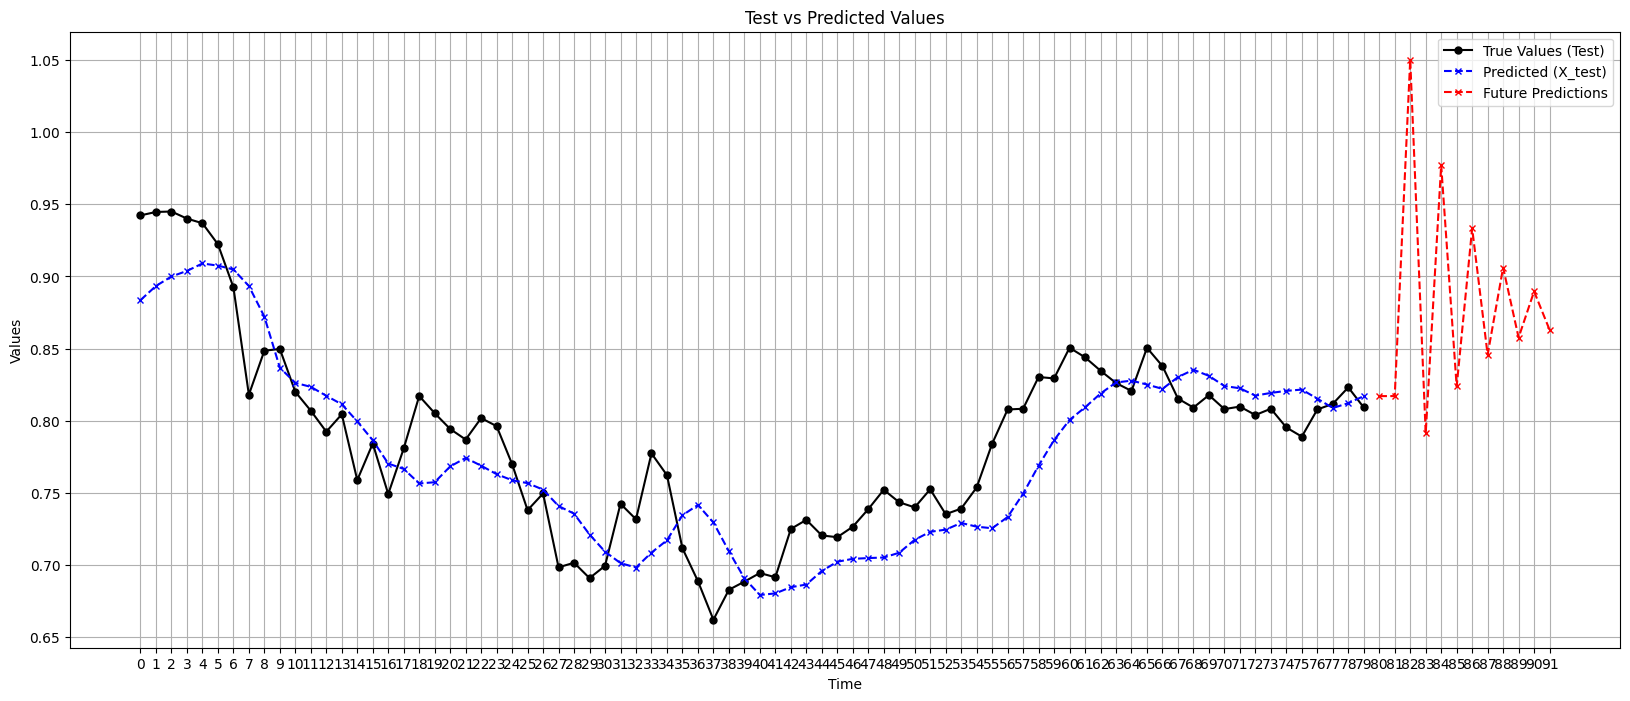

In [368]:
# plt.figure(figsize=(16,8))
# plt.plot(y_test, color = 'black', label = 'Test')
# plt.plot(y_pred, color = 'green', label = 'pred')
# plt.legend()
# plt.show()

# Define x_values for plotting
x_values = range(len(y_test) + num_predictions)

# Create a figure and axis with a larger size for better visibility
plt.figure(figsize=(20, 8))

# Plot test and prediction data for X_test
plt.plot(x_values[-(len(y_test) + num_predictions):-num_predictions], y_test, color='black', label='True Values (Test)', linestyle='-', marker='o', markersize=5)
plt.plot(x_values[-(len(y_test) + num_predictions):-num_predictions], y_pred, color='blue', label='Predicted (X_test)', linestyle='--', marker='x', markersize=5)

# Plot future predictions
plt.plot(x_values[-num_predictions:], future_predictions, color='red', label='Future Predictions', linestyle='--', marker='x', markersize=5)

# Add title and labels
plt.title('Test vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')

# Add grid for better readability
plt.grid(True)

# Set x ticks to show all data points
plt.xticks(x_values)

# Add legend
plt.legend()

# Show the plot
plt.show()

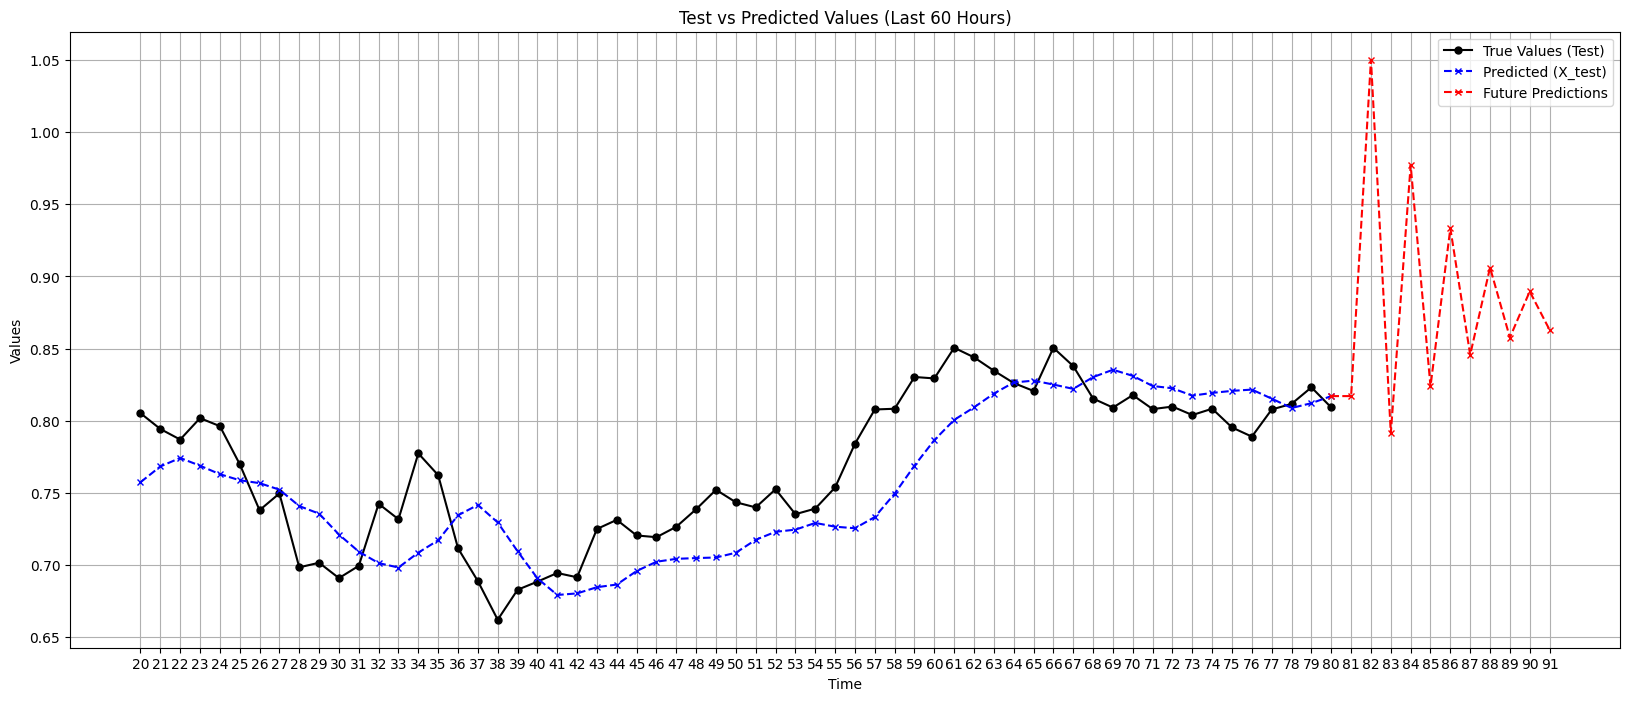

In [369]:
# Number of hours to display
num_hours =60
num_predictions = len(future_predictions)

# Calculate the start index for x_values based on the length of y_test and num_hours
start_index = len(y_test) - num_hours

# Define x_values for plotting
x_values = range(start_index, start_index + len(y_test[-num_hours:]) + num_predictions)

# Create a figure and axis with a larger size for better visibility
plt.figure(figsize=(20, 8))

# Plot test and prediction data for X_test
plt.plot(x_values[:len(y_test[-num_hours-1:])], y_test[-num_hours-1:], color='black', label='True Values (Test)', linestyle='-', marker='o', markersize=5)
plt.plot(x_values[:len(y_pred[-num_hours-1:])], y_pred[-num_hours-1:], color='blue', label='Predicted (X_test)', linestyle='--', marker='x', markersize=5)

# Adjust future_x_values to have the same length as future_predictions
future_x_values = range(start_index + len(y_test[-num_hours:]), start_index + len(y_test[-num_hours:]) + len(future_predictions))

# Plot future predictions
plt.plot(future_x_values, future_predictions, color='red', label='Future Predictions', linestyle='--', marker='x', markersize=5)

# Add title and labels
plt.title('Test vs Predicted Values (Last '+str(num_hours)+' Hours)')
plt.xlabel('Time')
plt.ylabel('Values')

# Add grid for better readability
plt.grid(True)

# Set x ticks to show all data points
plt.xticks(x_values)

# Add legend
plt.legend()

# Show the plot
plt.show()